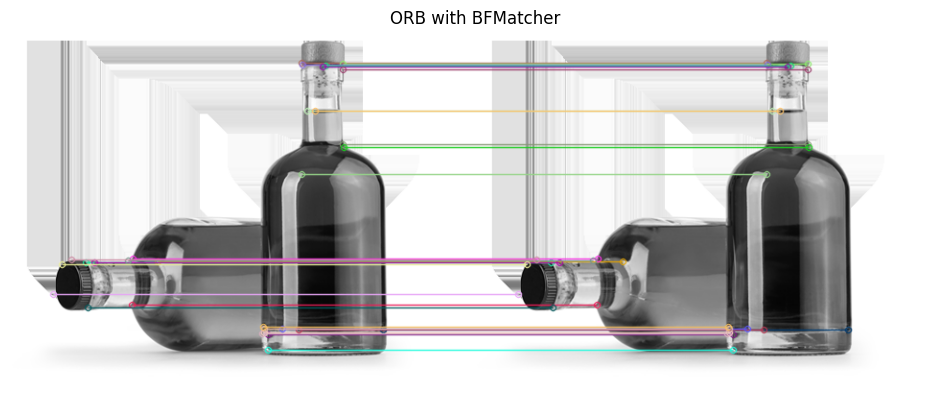

In [2]:
# ORB with BFMatcher (Free and Fast)

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the object and scene images
img_object = cv2.imread(r'C:\Users\Adeel\Desktop\Computer Vision\liquor-bottle-png-9.png', cv2.IMREAD_GRAYSCALE)
img_scene = cv2.imread(r'C:\Users\Adeel\Desktop\Computer Vision\liquor-bottle-png-9.png', cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

# Find keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img_object, None)
kp2, des2 = orb.detectAndCompute(img_scene, None)

# Create BFMatcher and match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
result = cv2.drawMatches(img_object, kp1, img_scene, kp2, matches[:30], None, flags=2)

# Show the result
plt.figure(figsize=(12,6))
plt.title("ORB with BFMatcher")
plt.imshow(result)
plt.axis('off')
plt.show()


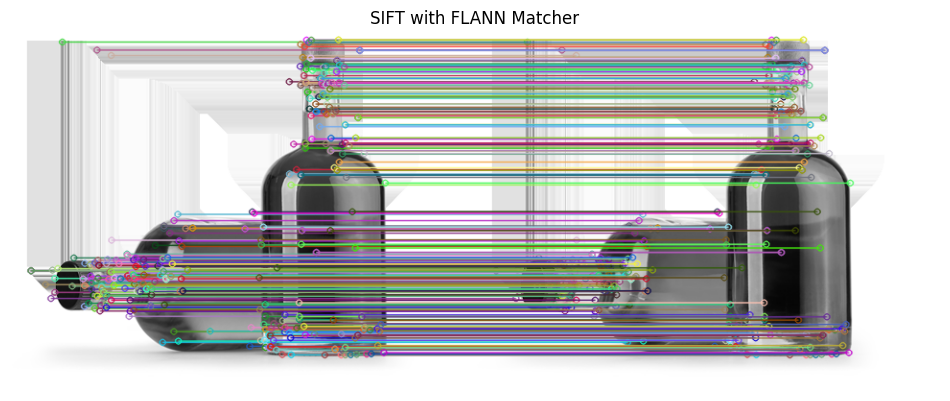

In [3]:
# SIFT with FLANN Matcher (More Accurate, Heavier)

# Load the images
img_object = cv2.imread(r'C:\Users\Adeel\Desktop\Computer Vision\liquor-bottle-png-9.png', cv2.IMREAD_GRAYSCALE)
img_scene = cv2.imread(r'C:\Users\Adeel\Desktop\Computer Vision\liquor-bottle-png-9.png', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img_object, None)
kp2, des2 = sift.detectAndCompute(img_scene, None)

# FLANN parameters and matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Apply Lowe’s ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
result = cv2.drawMatches(img_object, kp1, img_scene, kp2, good_matches, None, flags=2)

# Show the result
plt.figure(figsize=(12,6))
plt.title("SIFT with FLANN Matcher")
plt.imshow(result)
plt.axis('off')
plt.show()
